# **VoxCity Demo**

You can easily learn how the Python package "VoxCity" works by following this demo.

Please execute cells from Step 1 to Step 5 by clicking the ▶️ icons.

It is important to note that you need to choose either Option 1 or Option 2 in Step 2 and execute only one.

# Step1. Prepare environment

In [ ]:
#@title 1.1. Install voxcity
!pip install voxcity
!apt-get update
!apt-get install -y xvfb libgl1-mesa-glx

In [ ]:
#@title 1.2. Authenticate Google Earth Engine (Click link, generate token, copy and paste the token)
!earthengine authenticate --auth_mode=notebook

In [1]:
#@title 1.3. Authenticate Google Earth Engine on local environment
!earthengine authenticate

import ee
ee.Authenticate()
ee.Initialize(project='ee-project-250322')

Authenticate: Credentials already exist.  Use --force to refresh.


# Step2. Set target area by a rectangle

## 2.1. Option1 Set coordinates of vertices

In [2]:
rectangle_vertices = [
    (-74.02034270713835, 40.69992881162822),  # Southwest corner (longitude, latitude)
    (-74.02034270713835, 40.7111851828668),   # Northwest corner (longitude, latitude)
    (-74.00555129286164, 40.7111851828668),   # Northeast corner (longitude, latitude)
    (-74.00555129286164, 40.69992881162822)   # Southeast corner (longitude, latitude)
]

### 2.2. Option2 Draw a rectangle directly

In [ ]:
#@title 2.2.1. Set target city (you need to fill in required values before executing!)
cityname = "new york" #@param {type:"string"}

In [ ]:
#@title 2.2.2. Draw a rectangle on a map (Click ■ on the left side, then click the north west corner and the south east corner of the rectangle.)
from voxcity.geoprocessor.draw import draw_rectangle_map_cityname

m, rectangle_vertices = draw_rectangle_map_cityname(cityname, zoom=15)
m

## 2.3. Option3 Set the center location and the width [m] (east-west) and height [m] (nort-south)

In [ ]:
#@title 2.3.1. Set width (m) and height (m) (you need to fill in required values before executing!)
width = 1250 #@param {type:"number"}
height = 1250 #@param {type:"number"}

In [ ]:
#@title 2.3.2. Draw a center point (circlemarker) on a map (Click ○ on the left side and then click the center location on the map.)
from voxcity.geoprocessor.draw import center_location_map_cityname

m, rectangle_vertices = center_location_map_cityname(cityname, width, height, zoom=15)
m

# Step3 Set variables

In [3]:
#@title 3.1. Set data sources and meshsize (m)
building_source = 'OpenStreetMap' #@param ['OpenStreetMap', 'Global Building Atlas', 'Overture', 'EUBUCCO v0.1', 'Open Building 2.5D Temporal', 'Microsoft Building Footprints', 'Local file']
building_complementary_source = "None" #@param ['None', 'Global Building Atlas', 'Open Building 2.5D Temporal', 'Microsoft Building Footprints', 'England 1m DSM - DTM', 'Netherlands 0.5m DSM - DTM', 'OpenMapTiles', 'Local file', 'OpenStreetMap', 'Overture', 'EUBUCCO v0.1']
land_cover_source = 'OpenStreetMap' #@param ['OpenStreetMap', 'Urbanwatch', 'OpenEarthMapJapan', 'ESA WorldCover', 'ESRI 10m Annual Land Cover', 'Dynamic World V1']
canopy_height_source = 'High Resolution 1m Global Canopy Height Maps' #@param ['High Resolution 1m Global Canopy Height Maps', 'ETH Global Sentinel-2 10m Canopy Height (2020)', 'Static']
dem_source = 'USGS 3DEP 1m' #@param ['DeltaDTM', 'FABDEM', 'England 1m DTM', 'DEM France 1m', 'Netherlands 0.5m DTM', 'AUSTRALIA 5M DEM', 'USGS 3DEP 1m', 'NASA', 'COPERNICUS', 'Flat']
meshsize = 5 #@param {type:"number"}

In [4]:
#@title 3.2. Set optional parameters, data sources and meshsize (m)
kwargs = {
    # "building_path": 'path_to_building_source_file', #To set path to building base data source when you select 'Local file' as building_source.
    # "building_complementary_path": 'path_to_building_complemntary_source_file', #To set path to building complementary data source  when you select 'Local file' as building_complementary_source.
    "building_complementary_source": building_complementary_source, #Specify the complementary building data source (e.g. 'Open Building 2.5D Temporal', 'None', etc.)
    "building_complement_height": 10, # Default height in meters to use for buildings when height data is missing
    # "complement_polygon": True, #Set 'True' if you want to incorporate building footprints from building complementary source. Only building footprints that do not have any intersections with footprints from building source are included.
    "overlapping_footprint": False, #Set 'True' if you want to use overlapping footprints.
    "output_dir": 'output/test', #To set directory path for output files
    # "remove_perimeter_object": 0.1, #Set value more than 0 if you want to remove objects including buildings and trees near to domain boundarys (perimeter). Used mainly for CFD simulation. For instance, when you set 0.1, objects with distances from domain boundaries less than 0.1 * domain width (height) are removed.
    # "gridvis": True, #Set 'True' if you want to visualize extracted 2D grid data.
    # "mapvis": False, #Set 'True' if you want to visualize extracted 2D grid data on a basemap. Note that it take longer time than "gridvis".
    # "voxelvis": False, #Set 'True' if you want to visualize generated voxel 3d city model. Note that this visualiztion takes long time if the number of voxels is huge, e.g., more than one million.
    # "voxelvis_img_save_path": None, #Set path to save image file of generated voxel 3d city model.
    # "trunk_height_ratio": None, #To set ratio of tree trunk height against tree canopy height. Default: 0.59 (11.76 / 19.98).
    # "min_canopy_height": None, #To set minimum canopy height in meters if you want to exclude trees lower than that height.
    "dem_interpolation": True, #Set 'True' when mesh size if finer than resolution of dem data source and if you want to use interporation.
    # "dynamic_world_date": '2021-04-02', #To set date of Dynamic World.
    # "esri_landcover_year": '2023', #To set year of Esri Land Cover.
    "debug_voxel": True,             # enable step logs
}

# Step4 Get voxcity output

Creating Land Use Land Cover grid
 
Data source: OpenStreetMap
Fetching data from Overpass API...
Converting data to GeoJSON format...
Adjusted mesh size: (np.float64(4.999999444761338), np.float64(5.0004204455782135))


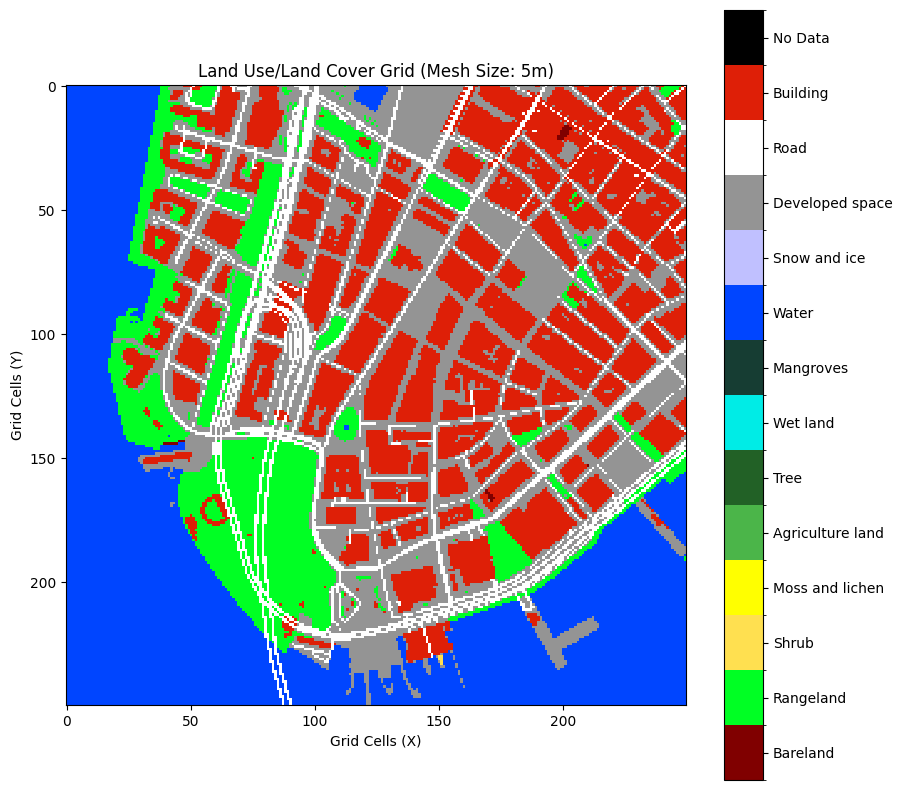

Creating Building Height grid
 
Data source: OpenStreetMap
190 of the total 1929 building footprint from the base data source did not have height data.


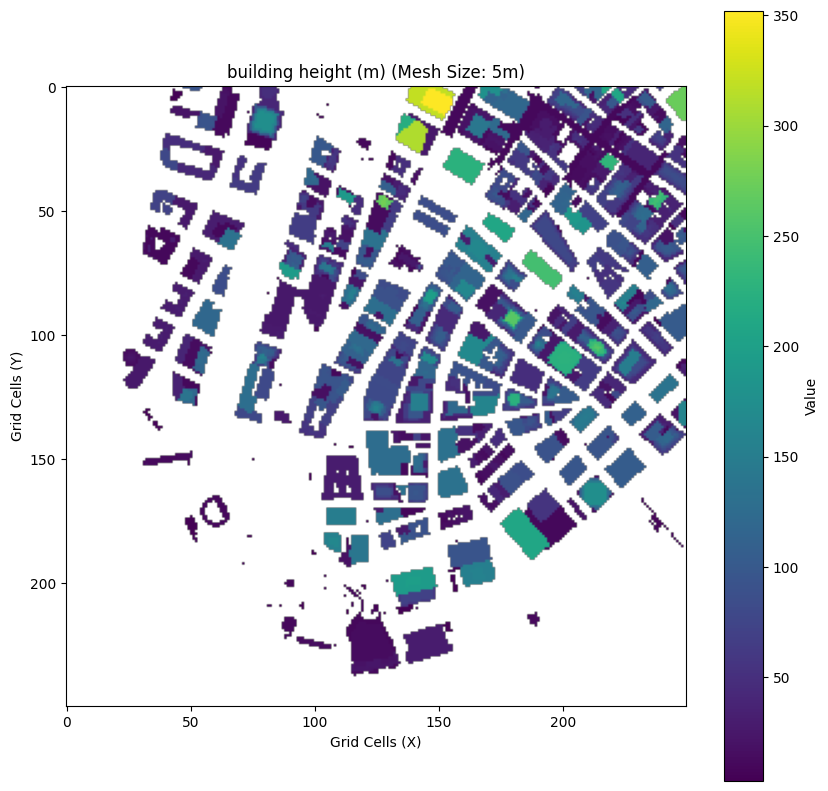

2025-10-30 22:52:57,257 - INFO - Created 1,929 records


Creating Canopy Height grid
 
Data source: High Resolution 1m Global Canopy Height Maps
Data source: High Resolution Canopy Height Maps by WRI and Meta


2025-10-30 22:52:59,019 - INFO - HTTP Request: GET https://earthengine.googleapis.com/v1/projects/ee-project-250322/maps/6f01813f48e2ece13fb8abaa157b84c2-8d8f99b9250f2d1242ca33ffca9dd4bd/tiles/14/4823/6160 "HTTP/1.1 200 OK"
Reading input: c:\Users\kunih\OneDrive\00_Codes\python\VoxelCity\demo\output\test\canopy_height.tif

Updating dataset tags...
Writing output to: c:\Users\kunih\OneDrive\00_Codes\python\VoxelCity\demo\output\test\canopy_height.tif
2025-10-30 22:52:59,179 - INFO - GDAL signalled an error: err_no=1, msg='Deleting c:\\Users\\kunih\\OneDrive\\00_Codes\\python\\VoxelCity\\demo\\output\\test\\canopy_height.tif failed:\nPermission denied'


Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to output/test\canopy_height.tif


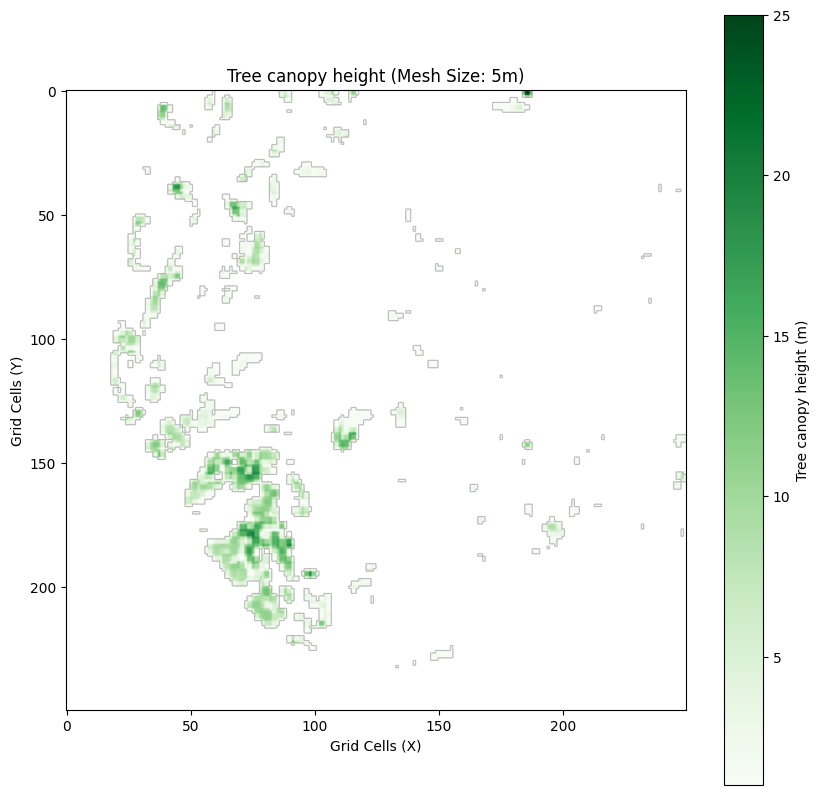

Creating Digital Elevation Model (DEM) grid
 
Data source: USGS 3DEP 1m
Generating URL ...
Please wait ...
Data downloaded to c:\Users\kunih\OneDrive\00_Codes\python\VoxelCity\demo\output\test\dem.tif


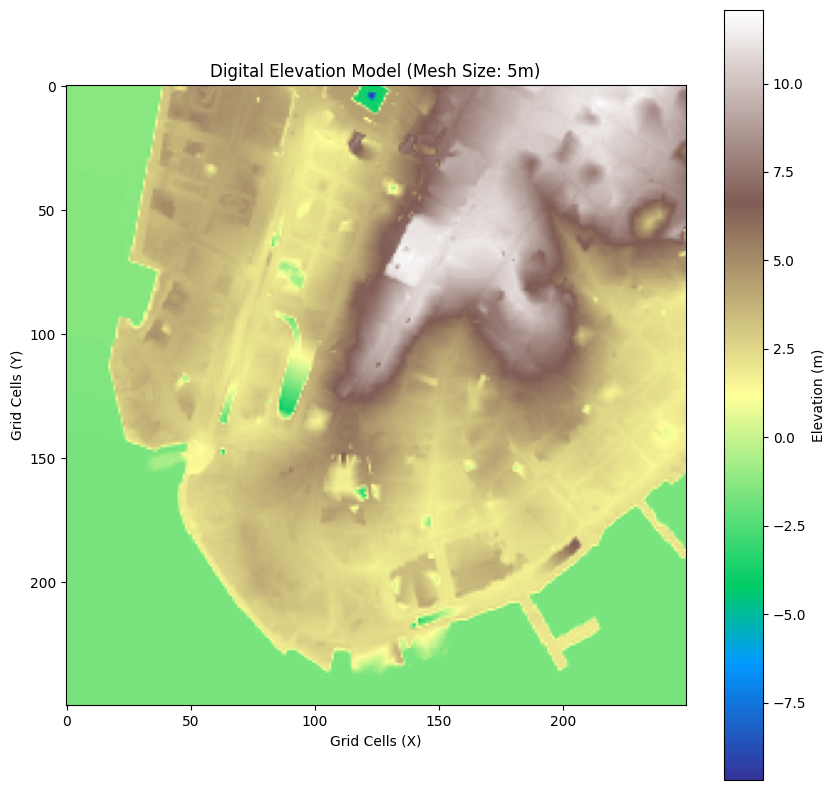

Generating 3D voxel data
Voxel grid shape: (250, 250, 75), dtype: <class 'numpy.int8'>, ~4.5 MB
Voxcity data saved to output/test/voxcity_data.pkl


In [5]:
#@title 4.1. Obtain grid data integrate it to create voxel data
from voxcity.generator import get_voxcity

voxcity_grid, building_height_grid, building_min_height_grid, building_id_grid, canopy_height_grid, canopy_bottom_height_grid, land_cover_grid, dem_grid, building_gdf = get_voxcity(
    rectangle_vertices,
    building_source,
    land_cover_source,
    canopy_height_source,
    dem_source,
    meshsize,
    **kwargs
)

In [ ]:
from pathlib import Path
from voxcity.utils.visualization import visualize_voxcity_plotly

# voxel_array, meshsize = ... # your data

# Create directories for a docs-hosted demo
out_dir = Path("docs") / "_static" / "plotly"
out_dir.mkdir(parents=True, exist_ok=True)
html_path = out_dir / "voxcity_demo.html"

# Build the interactive figure and save as a standalone HTML file
fig = visualize_voxcity_plotly(
    voxcity_grid,
    meshsize,
    show=False,          # don't auto-open
    return_fig=True,     # return Plotly figure
    width=2000,
    height=1600,
    downsample=1
)
fig.write_html(str(html_path), include_plotlyjs="cdn", full_html=True)
print(f"Wrote {html_path}")

In [ ]:
#@title 4.2. Visualize the generated 3D city model (This process may take a long time, so skip this step if you set a large target area)
from voxcity.utils.visualization import visualize_voxcity_plotly

visualize_voxcity_plotly(
    voxcity_grid,
    meshsize,
    opacity=1.0,
    downsample=1
)

# Step5 Export files

In [ ]:
#@title 5.1. Export INX file for ENVI-MET
from voxcity.exporter.envimet import export_inx, generate_edb_file

envimet_kwargs = {
    "output_directory": 'output/envimet', # To set directory path for output files
    "file_basename": 'voxcity', # To set directory path for output files
    "author_name": "enter your name", # Optional. To set author name in INX.
    "model_description": "generated and exported using VoxCity", # Optional. To desctibe model in INX.
    "domain_building_max_height_ratio": 2, # Optional. To set ratio between domain height (Z) and maximum height (building + terrain). Default: 2.0.
    "useTelescoping_grid": True, # Optional. To activate telescoping grid. Default: False.
    "verticalStretch": 20, # Optional. To set vertical stretch (%). Default: 0%.
    "min_grids_Z": 20, # Optional. To set minimum number of vertical grid cells (Z-axis). Default: 20.
    "lad": 1.0 # Optional. To set Leaf Area Density (LAD) of trees in m^-1. Default: 1.0 m^-1.
}

export_inx(
    building_height_grid,
    building_id_grid,
    canopy_height_grid,
    land_cover_grid,
    dem_grid,
    meshsize,
    land_cover_source,
    rectangle_vertices,
    **envimet_kwargs
)
generate_edb_file(**envimet_kwargs)

In [ ]:
#@title 5.2. VOX file for MagicaVoxel
from voxcity.exporter.magicavoxel import export_magicavoxel_vox

output_path = f"output/magicavoxel"
export_magicavoxel_vox(voxcity_grid, output_path)

In [ ]:
#@title 5.3. OBJ file
from voxcity.exporter.obj import export_obj

output_directory = './output/obj'
output_file_name = 'voxcity'

export_obj(voxcity_grid, output_directory, output_file_name, meshsize)

# Step6 Urban simulations

# 6.1. Solar radiation

In [ ]:
#@title 6.1.1. Ground-level solar irradiance (instantaneous)
from voxcity.simulator.solar import get_global_solar_irradiance_using_epw

solar_kwargs = {
    "download_nearest_epw": True,  # Whether to automatically download nearest EPW weather file based on location from Climate.OneBuilding.Org
    "rectangle_vertices": rectangle_vertices,  # Coordinates defining the area of interest for calculation
    # "epw_file_path": "./output/new.york-downtown.manhattan.heli_ny_usa_1.epw",  # Path to EnergyPlus Weather (EPW) file containing climate data. Set if you already have an EPW file.
    "calc_time": "01-01 9:00:00",  # Time for instantaneous calculation in format "MM-DD HH:MM:SS"
    "view_point_height": 1.5,  # Height of view point in meters for calculating solar access. Default: 1.5 m
    "tree_k": 0.6,    # Static extinction coefficient - controls how much sunlight is blocked by trees (higher = more blocking)
    "tree_lad": 0.5,    # Leaf area density of trees - density of leaves/branches that affect shading (higher = denser foliage)
    "dem_grid": dem_grid,      # Digital elevation model grid for terrain heights
    "colormap": 'magma',       # Matplotlib colormap for visualization. Default: 'viridis'
    "obj_export": True,        # Whether to export results as 3D OBJ file
    "output_directory": 'output/test',  # Directory for saving output files
    "output_file_name": 'instantaneous_solar_irradiance',  # Base filename for outputs (without extension)
    "alpha": 1.0,             # Transparency of visualization (0.0-1.0)
    "vmin": 0,               # Minimum value for colormap scaling in visualization
    # "vmax": 900,             # Maximum value for colormap scaling in visualization
}

# Compute global solar irradiance map (direct + diffuse radiation)
solar_grid = get_global_solar_irradiance_using_epw(
    voxcity_grid,                        # 3D voxel grid representing the urban environment
    meshsize,                            # Size of each voxel in meters
    calc_type='instantaneous',           # Calculate instantaneous irradiance at specified time
    direct_normal_irradiance_scaling=1.0, # Scaling factor for direct solar radiation (1.0 = no scaling)
    diffuse_irradiance_scaling=1.0,      # Scaling factor for diffuse solar radiation (1.0 = no scaling)
    **solar_kwargs                       # Pass all the parameters defined above
)

In [ ]:
#@title 6.1.1. Solar irradiance on building surfaces (cumulative)
from voxcity.simulator.solar import get_building_global_solar_irradiance_using_epw
from voxcity.utils.visualization import visualize_building_sim_results

# Define kwargs dictionary for cumulative calculation
cumulative_kwargs = {
    "calc_type": "cumulative",  # For cumulative calculations over a period
    "download_nearest_epw": True,
    "rectangle_vertices": rectangle_vertices,
    # "epw_file_path": epw_file_path,
    "period_start": "01-01 07:00:00",  # June 1st at 7 AM
    "period_end": "01-31 19:00:00",    # June 30th at 7 PM
    "building_id_grid": building_id_grid
}

# Example 2: Cumulative calculation for a month
cumulative_irradiance = get_building_global_solar_irradiance_using_epw(
    voxcity_grid,
    meshsize,
    **cumulative_kwargs
)

# both overlays at once
visualize_voxcity_plotly(
    voxcity_grid, meshsize,
    building_sim_mesh=cumulative_irradiance,
    building_value_name='global',
    building_colormap='magma',
    voxel_color_map='grayscale',
    downsample=1
)

#6.2. View index

In [ ]:
#@title 6.2.1. Green view index, Sky view index
from voxcity.simulator.view import get_view_index

view_kwargs = {
    "view_point_height": 1.5,      # Height of observer viewpoint in meters
    "tree_k": 0.6,                 # Static extinction coefficient - controls how much sunlight is blocked by trees (higher = more blocking)
    "tree_lad": 1.0,               # Leaf area density of trees - density of leaves/branches that affect shading (higher = denser foliage)
    "dem_grid": dem_grid,          # Digital elevation model grid
    "colormap": "viridis",         # Colormap for visualization
    "obj_export": True,            # Whether to export as OBJ file
    "output_directory": "output",  # Directory to save output files
    "output_file_name": "gvi"      # Base filename for outputs
}

# Compute Green View Index using mode='green'
gvi_grid = get_view_index(voxcity_grid, meshsize, mode='green', **view_kwargs)

# Adjust parameters for Sky View Index
view_kwargs["colormap"] = "BuPu_r"
view_kwargs["output_file_name"] = "svi"
view_kwargs["elevation_min_degrees"] = 0

# Compute Sky View Index using mode='sky'
svi_grid = get_view_index(voxcity_grid, meshsize, mode='sky', **view_kwargs)

In [ ]:
#@title 6.2.2. Green view index on building surfaces
from voxcity.simulator.view import get_surface_view_factor
from voxcity.utils.visualization import visualize_building_sim_results
import numpy as np

building_gvi_mesh = get_surface_view_factor(
    voxcity_grid,
    meshsize,
    target_values=(-2,2,3,4,5,6,7,8),           # Target vegetation voxels (Rangeland, Shrub, Agriculture land, tree, Moss, Wet land, Mangrove)
    inclusion_mode=True,         # Exclusion mode - count rays that DON'T hit sky
    progress_report=True          # Show progress during computation
)

# add building overlay
visualize_voxcity_plotly(
    voxcity_grid, meshsize,
    building_sim_mesh=building_gvi_mesh,
    building_value_name='view_factor_values',
    building_colormap='viridis',
    building_opacity=1.0,
    building_vmin=0,
    building_vmax=1,
    render_voxel_buildings=False,  # hide class -3 in cubes when overlaying
    voxel_color_map="grayscale",
    downsample=1
)

# 6.3. Landmark visibility

In [ ]:
#@title 6.3.1. Map for drawing a polygon to specify landmark buildings - draw a polygon that includes all desired landmark building footprints
from voxcity.geoprocessor.draw import display_buildings_and_draw_polygon

# Create interactive map with buildings and get drawn polygon
m_landmark, landmark_polygon = display_buildings_and_draw_polygon(building_gdf)
m_landmark

In [ ]:
#@title 6.3.2. Simulate landmark visibility
from voxcity.simulator.view import get_landmark_visibility_map  # Import function to analyze landmark visibility from different viewpoints

landmark_kwargs = {
    "view_point_height": 1.5, # To set height of view point in meters. Default: 1.5 m.
    "landmark_polygon": landmark_polygon,
    "dem_grid": dem_grid,
    "colormap": 'cool', # Choose a colormap.  Default: 'viridis'.
    "obj_export": True, # Set "True" if you export the result in an OBJ file.
    "output_directory": 'output/obj', # To set directory path for output files. Default: False.
    "output_file_name": 'landmark_visibility', # To set file name excluding extension. Default: 'view_index.
    "alpha": 1.0, # Set transparency (0.0 to 1.0)
    "vmin": 0.0, # Minimum value for colormap normalization
    "vmax": 1.0 # Maximum value for colormap normalization
}

landmark_vis_map, voxcity_grid_landmark = get_landmark_visibility_map(  # Calculate visibility map for landmarks
    voxcity_grid,                               # Input voxel grid representing the 3D urban environment
    building_id_grid,                           # Grid containing building IDs for each cell
    building_gdf,                           # GeoJSON containing building footprint data
    meshsize,                                   # Size of each grid cell in meters
    **landmark_kwargs                           # Pass all configuration parameters defined above
)

In [ ]:
#@title Data aggregation by road networks
from voxcity.geoprocessor.network import get_network_values

network_kwargs = {
    "network_type": "walk",
    "colormap": "magma",
    "vis_graph": True,
    "vmin": 0.0,
    # "vmax": 65000,
    "edge_width": 2,
    "alpha": 0.8,
    "zoom": 16
}

G, solar_edge_gdf = get_network_values(
    solar_grid,
    rectangle_vertices,
    meshsize,
    value_name='Cumulative Global Solar Irradiance (W/m²·hour), yearly, 7:00-9:00',
    **network_kwargs
)